![Model training: spectrum of workflows](https://keras-dev.s3.amazonaws.com/tutorials-img/model-training-spectrum.png)

In [ ]:
!pip3 install Pillow tqdm

     |████████████████████████████████| 61kB 707kB/s eta 0:00:01


**Restart now!**

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from collections import Counter
import os

# Сохранение и загрузка моделей

Есть несколько способов сохранить и загрузить модели.

## Сохранение весов

### Whole-model saving & loading
```
You can save an entire model to a single artifact. It will include:

The model's architecture/config
The model's weight values (which were learned during training)
The model's compilation information (if compile()) was called
The optimizer and its state, if any (this enables you to restart training where you left)
```

In [2]:
# !apt-get install tree

In [3]:
keras.backend.clear_session()

In [4]:
inp = keras.layers.Input(10)
dense = keras.layers.Dense(10)(inp)
model  = keras.Model(inp, dense)

model.save_weights('saved_model/model_weights')

 ```
 save_format: Either 'tf' or 'h5'. A `filepath` ending in '.h5' or
        '.keras' will default to HDF5 if `save_format` is `None`. Otherwise
        `None` defaults to 'tf'.
```


In [26]:
!chcp 65001

Active code page: 65001


In [29]:
!tree saved_model /f

Folder PATH listing
Volume serial number is 00000202 2231:BA4E
C:\USERS\DSHER\YANDEXDISK\PC\EDUCATION\OTUS_DEEP_LEARNING_DLE-2020-04\MONTH1\7_DIVE_INTO_TENSORFLOW\SAVED_MODEL
    checkpoint
    model_weights.data-00000-of-00001
    model_weights.index
    
No subfolders exist 



In [ ]:
!tree saved_model

saved_model
├── checkpoint
├── model_weights.data-00000-of-00002
├── model_weights.data-00001-of-00002
└── model_weights.index

0 directories, 4 files


In [30]:
model.save_weights('model_weights.h5')

In [31]:
[l.name for l in model.layers]

['input_1', 'dense']

In [ ]:
!ls 

model_weights.h5  sample_data  saved_model


In [41]:
os.listdir()

['.ipynb_checkpoints',
 'model_weights.h5',
 'saved_model',
 'tensorflow_intro_2nd_part_2020.ipynb']

In [ ]:
model.save_weights('model_weights.h5', save_format='h5')

In [ ]:
!ls

model_weights.h5  sample_data  saved_model


In [42]:
model.save_weights('model_weights.h5', overwrite=False, save_format='h5')

[WARNING] model_weights.h5 already exists - overwrite? [y/n] y


[TIP] Next time specify overwrite=True!


## Загрузка весов

### Стандартная загрузка весов

In [43]:
status = model.load_weights('saved_model/model_weights')
status

In [44]:
status = model.load_weights('model_weights.h5')
status

In [45]:
keras.backend.clear_session()

In [46]:
def make_model(layer_name, last_layer=10):
  inp = keras.layers.Input(10)
  dense = keras.layers.Dense(10)(inp)
  dense = keras.layers.Dense(last_layer, name=layer_name)(dense)
  model  = keras.Model(inp, dense)

  return model

In [47]:
model = make_model('my_dense_layer')

### Загрузка весов по именам

> **Не работает c tf - форматом модели!**

Получим и запомним веса модели:

In [48]:
layers = model.layers
dense_1 = layers[1]
dense_2 = layers[2]
w1 = dense_1.weights[0]  # 0 - kernel (здесь - 10х10), 1 - bias (здесь - 1х10)
w2 = dense_2.weights[0]

In [50]:
dense_2.weights

[<tf.Variable 'my_dense_layer/kernel:0' shape=(10, 10) dtype=float32, numpy=
 array([[ 0.2408644 , -0.49372712, -0.28965136, -0.43899983,  0.02207118,
          0.3524326 ,  0.3988219 ,  0.5127065 , -0.31596562,  0.13398123],
        [-0.33798197, -0.00863546,  0.29996789,  0.09583795,  0.38577676,
         -0.48259625,  0.49426854, -0.4044275 ,  0.2818535 ,  0.2905314 ],
        [-0.19708344,  0.31661427,  0.2561068 , -0.19644383, -0.01127362,
          0.30599165, -0.03354406, -0.26307687,  0.13753706,  0.02066582],
        [-0.4738683 , -0.2505349 ,  0.2553286 ,  0.34694445,  0.20864534,
         -0.20767066,  0.07435465, -0.1192964 , -0.09524158,  0.531073  ],
        [ 0.37299085,  0.47593594,  0.5085145 , -0.5109027 ,  0.25261658,
         -0.5401328 ,  0.09175885, -0.0748632 ,  0.54509854,  0.28522527],
        [-0.20827684, -0.14993897, -0.5404984 ,  0.39201063, -0.3626687 ,
         -0.40956703,  0.19121069,  0.45740175, -0.49394742, -0.3935026 ],
        [-0.48688447, -0.1071

In [51]:
model.get_layer('my_dense_layer').weights

[<tf.Variable 'my_dense_layer/kernel:0' shape=(10, 10) dtype=float32, numpy=
 array([[ 0.2408644 , -0.49372712, -0.28965136, -0.43899983,  0.02207118,
          0.3524326 ,  0.3988219 ,  0.5127065 , -0.31596562,  0.13398123],
        [-0.33798197, -0.00863546,  0.29996789,  0.09583795,  0.38577676,
         -0.48259625,  0.49426854, -0.4044275 ,  0.2818535 ,  0.2905314 ],
        [-0.19708344,  0.31661427,  0.2561068 , -0.19644383, -0.01127362,
          0.30599165, -0.03354406, -0.26307687,  0.13753706,  0.02066582],
        [-0.4738683 , -0.2505349 ,  0.2553286 ,  0.34694445,  0.20864534,
         -0.20767066,  0.07435465, -0.1192964 , -0.09524158,  0.531073  ],
        [ 0.37299085,  0.47593594,  0.5085145 , -0.5109027 ,  0.25261658,
         -0.5401328 ,  0.09175885, -0.0748632 ,  0.54509854,  0.28522527],
        [-0.20827684, -0.14993897, -0.5404984 ,  0.39201063, -0.3626687 ,
         -0.40956703,  0.19121069,  0.45740175, -0.49394742, -0.3935026 ],
        [-0.48688447, -0.1071

In [49]:
print(model.get_layer('my_dense_layer'))
model.save_weights('saved_model_named_layer.h5', save_format='h5')

In [52]:
[l.name for l in model.layers]

['input_1', 'dense', 'my_dense_layer']

In [53]:
keras.backend.clear_session()

In [54]:
model_2 = make_model('one_more_dense_layer')

In [55]:
[l.name for l in model_2.layers]

['input_1', 'dense', 'one_more_dense_layer']

In [57]:
# model_2.load_weights('saved_model_named_layer.h5', 
#                      by_name=True, skip_mismatch=True)  # skip_mismatch - в в2.0, похоже, еще не было
model_2.load_weights('saved_model_named_layer.h5', 
                     by_name=True)  # работает как для skip_mismatch=True

Получим веса модели:

In [58]:
layers = model_2.layers
dense_1 = layers[1] 
dense_2 = layers[2]
w1_new = dense_1.weights[0]
w2_new = dense_2.weights[0]

Этот слой был загружен:

In [69]:
dense_1.weights[0]

<tf.Variable 'dense/kernel:0' shape=(10, 10) dtype=float32, numpy=
array([[ 0.16611141, -0.15675458,  0.17282295,  0.37168914, -0.28305542,
        -0.29333982,  0.09799045,  0.40909612,  0.1460352 ,  0.29338175],
       [-0.08270377,  0.10791457, -0.04734153, -0.3325178 ,  0.3284018 ,
        -0.3081702 ,  0.43532926, -0.4692446 ,  0.2940477 , -0.5135378 ],
       [-0.03419113,  0.5111964 ,  0.46649444,  0.05551344, -0.27998817,
        -0.5309902 ,  0.3270923 , -0.17007083,  0.15273249,  0.50056136],
       [ 0.46376157,  0.53097236, -0.43046424,  0.27069062,  0.44724643,
         0.15677637,  0.05668402, -0.3897256 ,  0.38585758, -0.27312216],
       [-0.36087328,  0.4536289 ,  0.41623586,  0.40222698, -0.01046079,
         0.35781568,  0.3707959 , -0.13916579,  0.14889425,  0.2896763 ],
       [ 0.20777828, -0.3571911 , -0.01621604,  0.53325427, -0.28339872,
         0.25514764,  0.20575249, -0.4025166 ,  0.29256463,  0.46324968],
       [ 0.46512806, -0.12588167,  0.23519117,  0.0

In [70]:
w1

<tf.Variable 'dense/kernel:0' shape=(10, 10) dtype=float32, numpy=
array([[ 0.16611141, -0.15675458,  0.17282295,  0.37168914, -0.28305542,
        -0.29333982,  0.09799045,  0.40909612,  0.1460352 ,  0.29338175],
       [-0.08270377,  0.10791457, -0.04734153, -0.3325178 ,  0.3284018 ,
        -0.3081702 ,  0.43532926, -0.4692446 ,  0.2940477 , -0.5135378 ],
       [-0.03419113,  0.5111964 ,  0.46649444,  0.05551344, -0.27998817,
        -0.5309902 ,  0.3270923 , -0.17007083,  0.15273249,  0.50056136],
       [ 0.46376157,  0.53097236, -0.43046424,  0.27069062,  0.44724643,
         0.15677637,  0.05668402, -0.3897256 ,  0.38585758, -0.27312216],
       [-0.36087328,  0.4536289 ,  0.41623586,  0.40222698, -0.01046079,
         0.35781568,  0.3707959 , -0.13916579,  0.14889425,  0.2896763 ],
       [ 0.20777828, -0.3571911 , -0.01621604,  0.53325427, -0.28339872,
         0.25514764,  0.20575249, -0.4025166 ,  0.29256463,  0.46324968],
       [ 0.46512806, -0.12588167,  0.23519117,  0.0

In [59]:
np.allclose(w1_new.numpy(), w1.numpy())

True

А этот слой не был, потому что его имя не совпадает:

In [60]:
np.allclose(w2_new.numpy(), w2.numpy())

False

MM: остается дефолтная инициализация, которая была в модели до загрузки весов

### Загрузка весов из модели с другой топологией

In [71]:
def make_model_three_layers(layer_name, last_layer=10):
  inp = keras.layers.Input(10)
  dense = keras.layers.Dense(10)(inp)
  dense = keras.layers.Dense(10)(dense)

  dense = keras.layers.Dense(last_layer, name=layer_name)(dense)
  model  = keras.Model(inp, dense)

  return model

In [72]:
keras.backend.clear_session()

In [73]:
model_3 = make_model_three_layers('yer_another_model')
model_3.save_weights('saved_model_20_units.h5', save_format='h5')
weight = model_3.layers[1].weights[0]

In [74]:
keras.backend.clear_session()
model_3 = make_model_three_layers('yer_another_model', 20)

### Несовпвадающие слои при загрузке by_name

По умолчанию модель с другой топологией не будет загружена.

In [84]:
try:
  model_3.load_weights('saved_model_20_units.h5', by_name=True)
except ValueError as e:
  print('weight mismatch')

weight mismatch


Можно промотать несовпадающие по топологии слои:

In [81]:
# model_3.load_weights('saved_model_20_units.h5', 
#                      by_name=True, skip_mismatch=True)

Загруженные веса (с совпадающей топологией и именами) восстановлены:

In [82]:
np.allclose(model_3.layers[1].weights[0].numpy(), weight.numpy())

True

## Загрузка и сохранение целой модели

In [92]:
keras.backend.clear_session()

In [93]:
model = make_model_three_layers('yer_another_model')
model.compile(optimizer='adam', loss='mse')

In [94]:
if not os.path.exists('entire_model/model'):
    os.mkdir('entire_model/model')  # для в2.2 это делается автоматом
model.save('entire_model/model', 
           overwrite=True,
           include_optimizer=True,  # Состояние оптимизатора. Adam и проч. 
           save_format='tf')
[l.name for l in model.layers]

INFO:tensorflow:Assets written to: entire_model/model\assets


['input_1', 'dense', 'dense_1', 'yer_another_model']

In [95]:
model.save('entire_model/model', 
           overwrite=True,
           include_optimizer=True,  # Состояние оптимизатора. Adam и проч. 
           save_format='tf')
[l.name for l in model.layers]

INFO:tensorflow:Assets written to: entire_model/model\assets


['input_1', 'dense', 'dense_1', 'yer_another_model']

In [ ]:
!tree entire_model

entire_model
└── model
    ├── assets
    ├── saved_model.pb
    └── variables
        ├── variables.data-00000-of-00002
        ├── variables.data-00001-of-00002
        └── variables.index

3 directories, 4 files


In [97]:
# with open('entire_model/model/saved_model.pb', 'rb') as file:
#   for line in file.readlines():
#     print(line)

In [98]:
import tensorflow
from tensorflow import keras

In [99]:
model = keras.models.load_model('entire_model/model')

In [100]:
[l.name for l in model.layers]

['input_1', 'dense', 'dense_1', 'yer_another_model']

## Сохранение / загрузка своих слоев

In [101]:
keras.backend.clear_session()

In [102]:
class MyShinyLayer(keras.layers.Layer):
  def __init__(self, parameter, *args, **kwargs):
    super().__init__(*args, **kwargs)
    self.parameter = parameter

  def call(self, inputs):
    return inputs

  def build(self, input_shape):
    print("Building layer with parameter %d" % self.parameter)

  def get_config(self):
    # используйте keras.utils.serialize_keras_object - если вам надо
    # сериализовать добавленный объект, например, инициализатор.
    base_config = super().get_config()
    base_config['parameter'] = self.parameter
    return base_config

In [103]:
def make_model_with_my_layer():
  inp = keras.layers.Input(10)
  dense = keras.layers.Dense(10)(inp)
  dense = keras.layers.Dense(10)(dense)
  dense = MyShinyLayer(1)(dense)  
  dense = keras.layers.Dense(10)(dense)
  model  = keras.Model(inp, dense)
  return model

In [104]:
my_model = make_model_with_my_layer()

Building layer with parameter 1


Сохраняем модель с кастомным слоем (обратите внимание: вызывается метод `call` кастомного слоя)


In [122]:
os.makedirs('my_model', exist_ok=True)  # для в2.2 это делается автоматом
my_model.save(r'my_model\model', 
              save_format='tf')

INFO:tensorflow:Assets written to: my_model\model\assets


In [110]:
os.makedirs('my_model', exist_ok=True)  # для в2.2 это делается автоматом
my_model.save(os.path.join('my_model', 'model'), 
              save_format='tf')

INFO:tensorflow:Assets written to: my_model\model\assets


Теперь мы можем загрузить модель из набора файлов. Обратите внимание, что модель восстанавливается в сохраненном виде. Например, здесь она не скомпилирована.

In [112]:
loaded_model = keras.models.load_model('my_model/model')

Наш слой "виден" среди слоев модели.

In [113]:
loaded_model.layers

In [114]:
loaded_model.compile('adam', loss='mse')

In [115]:
data = np.random.normal(0, 1, (2000, 10))

In [121]:
# loaded_model.summary()

In [117]:
loaded_model.fit(data, data)

Train on 2000 samples
2000/2000 [==============================] - 1s 315us/sample - loss: 1.4058


### Работает ли то же самое с (устаревшим) h5?

Просто загрузить модель через `keras.models.load_model` (*насколько я знаю) нельзя:

In [119]:
try:
  keras.backend.clear_session()
  my_model = make_model_with_my_layer()
  os.makedirs('my_model_h5', exist_ok=True)
  my_model.save('my_model_h5/model.h5', 
                save_format='h5')
  loaded_model = keras.models.load_model('my_model_h5/model.h5')
  loaded_model.compile('adam', loss='mse')
  loaded_model.fit(data, data)
except Exception as e:
  print(e)

Building layer with parameter 1
Unknown layer: MyShinyLayer


Вам нужен экземляр модели, куда можно загрузить созраненные веса:

In [120]:
keras.backend.clear_session()
my_model = make_model_with_my_layer()
os.makedirs('my_model_h5', exist_ok=True)
my_model.save('my_model_h5/model.h5', 
              save_format='h5')

keras.backend.clear_session()
loaded_model = make_model_with_my_layer()
loaded_model.load_weights('my_model_h5/model.h5')
loaded_model.compile('adam', loss='mse')
loaded_model.fit(data, data)

Building layer with parameter 1
Building layer with parameter 1
Train on 2000 samples
2000/2000 [==============================] - 0s 181us/sample - loss: 1.5541


А если метода get_config нет?

In [ ]:
class MyShinyLayer(keras.layers.Layer):
  def __init__(self, parameter, *args, **kwargs):
    super().__init__(*args, **kwargs)
    self.parameter = parameter

  def call(self, inputs):
    return inputs

  def build(self, input_shape):
    print("Building layer with parameter %d" % self.parameter)

In [ ]:
try:
  keras.backend.clear_session()
  my_model = make_model_with_my_layer()
  os.makedirs('my_model_h5', exist_ok=True)
  my_model.save('my_model_h5/model.h5', 
                save_format='h5')

  keras.backend.clear_session()
  loaded_model = make_model_with_my_layer()
  loaded_model.load_weights('my_model_h5/model.h5')
  loaded_model.compile('adam', loss='mse')
  loaded_model.fit(data, data)
except Exception as e:
  print(e)

Building layer with parameter 1
Layer MyShinyLayer has arguments in `__init__` and therefore must override `get_config`.


# Коллбэки и сохранение модели
## Коллбэки

## Подготавливаем данные

In [ ]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.imdb.load_data()
frequent_thr = 20
rare_thr = 1000


def filter_sentence(sentense, freq, rare):
    arr = np.zeros(rare - freq)
    counter = Counter(sentense)
    for item, count in counter.items():
        if item > freq and item < rare:
            arr[item - freq] += 1
    return arr


def preprocess(X, freq, rare):
    return np.array([filter_sentence(x, freq, rare) for x in X])

17465344/17464789 [==============================] - 0s 0us/step


In [ ]:
X_test

array([list([1, 591, 202, 14, 31, 6, 717, 10, 10, 18142, 10698, 5, 4, 360, 7, 4, 177, 5760, 394, 354, 4, 123, 9, 1035, 1035, 1035, 10, 10, 13, 92, 124, 89, 488, 7944, 100, 28, 1668, 14, 31, 23, 27, 7479, 29, 220, 468, 8, 124, 14, 286, 170, 8, 157, 46, 5, 27, 239, 16, 179, 15387, 38, 32, 25, 7944, 451, 202, 14, 6, 717]),
       list([1, 14, 22, 3443, 6, 176, 7, 5063, 88, 12, 2679, 23, 1310, 5, 109, 943, 4, 114, 9, 55, 606, 5, 111, 7, 4, 139, 193, 273, 23, 4, 172, 270, 11, 7216, 10626, 4, 8463, 2801, 109, 1603, 21, 4, 22, 3861, 8, 6, 1193, 1330, 10, 10, 4, 105, 987, 35, 841, 16873, 19, 861, 1074, 5, 1987, 17975, 45, 55, 221, 15, 670, 5304, 526, 14, 1069, 4, 405, 5, 2438, 7, 27, 85, 108, 131, 4, 5045, 5304, 3884, 405, 9, 3523, 133, 5, 50, 13, 104, 51, 66, 166, 14, 22, 157, 9, 4, 530, 239, 34, 8463, 2801, 45, 407, 31, 7, 41, 3778, 105, 21, 59, 299, 12, 38, 950, 5, 4521, 15, 45, 629, 488, 2733, 127, 6, 52, 292, 17, 4, 6936, 185, 132, 1988, 5304, 1799, 488, 2693, 47, 6, 392, 173, 4, 21686, 4

In [ ]:
x_test = preprocess(X_test, frequent_thr, rare_thr)
x_train = preprocess(X_train, frequent_thr, rare_thr)

In [ ]:
print(x_test.shape)
print(x_test[:5])

(25000, 980)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 1. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


## Создаем коллбэки

In [ ]:
monitor = 'val_accuracy'
os.makedirs('imdb_model', exist_ok=True)
model_filepath = 'imdb_model/imdb_model.{epoch:02d}-{val_loss:.2f}.h5'
early_stopping = keras.callbacks.EarlyStopping(monitor=monitor,
                                               min_delta=0.001, 
                                               patience=2,
                                               mode='max',
                                               restore_best_weights=True)

checkpoint = keras.callbacks.ModelCheckpoint(filepath=model_filepath,
                                             monitor=monitor,
                                             save_best_only=True,
                                             mode='auto',
                                             period=1)

tensorboard = keras.callbacks.TensorBoard(log_dir='logs',
                                          histogram_freq=1,
                                          write_graph=True,
                                          write_grads=True,
                                          write_images=True,
                                          update_freq='batch')

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
# Не делайте так:
# from keras import Sequential
# from keras.layers import Dense
# Если видите ошибку в духе 'Sequential can't run in eager mode', 
# скорее всего, вы импоритировали слои и модель из обычного keras.


def train_with_callbacks(callbacks):
    model = Sequential([Dense(128, activation='relu',
                              input_shape=(rare_thr - frequent_thr,)),
                        Dense(128, activation='relu'), 
                        Dense(1, activation='sigmoid')],
                       )
    model.compile('sgd', loss='binary_crossentropy', metrics=['accuracy'],
                  run_eagerly=False)
    h = model.fit(x_train, Y_train,
                  validation_data=(x_test, Y_test),
                  batch_size=128,
                  epochs=1000,
                  callbacks=callbacks)
    return model

Здесь мы сохраняем модель в h5.

In [ ]:
keras.backend.clear_session()
model = train_with_callbacks([early_stopping, checkpoint, tensorboard])

Epoch 1/1000
196/196 [==============================] - 2s 9ms/step - loss: 0.6875 - accuracy: 0.5513 - val_loss: 0.6750 - val_accuracy: 0.6014
Epoch 2/1000
196/196 [==============================] - 1s 8ms/step - loss: 0.6629 - accuracy: 0.6433 - val_loss: 0.6475 - val_accuracy: 0.6775
Epoch 3/1000
196/196 [==============================] - 1s 7ms/step - loss: 0.6257 - accuracy: 0.7076 - val_loss: 0.6008 - val_accuracy: 0.7292
Epoch 4/1000
196/196 [==============================] - 1s 7ms/step - loss: 0.5681 - accuracy: 0.7519 - val_loss: 0.5384 - val_accuracy: 0.7622
Epoch 5/1000
196/196 [==============================] - 1s 7ms/step - loss: 0.5047 - accuracy: 0.7828 - val_loss: 0.4820 - val_accuracy: 0.7878
Epoch 6/1000
196/196 [==============================] - 1s 7ms/step - loss: 0.4542 - accuracy: 0.8045 - val_loss: 0.4414 - val_accuracy: 0.8070
Epoch 7/1000
196/196 [==============================] - 1s 8ms/step - loss: 0.4189 - accuracy: 0.8210 - val_loss: 0.4189 - val_accuracy:

In [ ]:
!tree imdb_model 

imdb_model
├── imdb_model.01-0.67.h5
├── imdb_model.02-0.65.h5
├── imdb_model.03-0.60.h5
├── imdb_model.04-0.54.h5
├── imdb_model.05-0.48.h5
├── imdb_model.06-0.44.h5
├── imdb_model.07-0.42.h5
├── imdb_model.08-0.40.h5
├── imdb_model.09-0.38.h5
├── imdb_model.10-0.37.h5
├── imdb_model.11-0.37.h5
├── imdb_model.12-0.36.h5
├── imdb_model.13-0.35.h5
├── imdb_model.14-0.35.h5
├── imdb_model.15-0.34.h5
├── imdb_model.16-0.34.h5
├── imdb_model.17-0.34.h5
├── imdb_model.18-0.34.h5
└── imdb_model.19-0.34.h5

0 directories, 19 files


Можно сохранять модель и в новом стандартном tf-формате.

In [ ]:
os.makedirs('imdb_model_tf', exist_ok=True)
model_filepath = 'imdb_model_tf/imdb_model.{epoch:02d}-{val_loss:.2f}'
checkpoint = keras.callbacks.ModelCheckpoint(filepath=model_filepath,
                                             monitor=monitor,
                                             save_best_only=True,
                                             mode='max',
                                             period=1)

keras.backend.clear_session()
model = train_with_callbacks([early_stopping, checkpoint, tensorboard])

Epoch 1/1000
196/196 [==============================] - 2s 10ms/step - loss: 0.6873 - accuracy: 0.5458 - val_loss: 0.6768 - val_accuracy: 0.5883
Epoch 2/1000
196/196 [==============================] - 2s 9ms/step - loss: 0.6604 - accuracy: 0.6401 - val_loss: 0.6460 - val_accuracy: 0.6723
Epoch 3/1000
196/196 [==============================] - 2s 9ms/step - loss: 0.6177 - accuracy: 0.7095 - val_loss: 0.5935 - val_accuracy: 0.7310
Epoch 4/1000
196/196 [==============================] - 2s 9ms/step - loss: 0.5537 - accuracy: 0.7571 - val_loss: 0.5260 - val_accuracy: 0.7694
Epoch 5/1000
196/196 [==============================] - 2s 9ms/step - loss: 0.4879 - accuracy: 0.7883 - val_loss: 0.4683 - val_accuracy: 0.7950
Epoch 6/1000
196/196 [==============================] - 2s 9ms/step - loss: 0.4383 - accuracy: 0.8111 - val_loss: 0.4301 - val_accuracy: 0.8132
Epoch 7/1000
196/196 [==============================] - 2s 9ms/step - loss: 0.4051 - accuracy: 0.8266 - val_loss: 0.4037 - val_accuracy

In [ ]:
!tree imdb_model_tf

imdb_model_tf
├── imdb_model.01-0.68
│   ├── assets
│   ├── saved_model.pb
│   └── variables
│       ├── variables.data-00000-of-00002
│       ├── variables.data-00001-of-00002
│       └── variables.index
├── imdb_model.02-0.65
│   ├── assets
│   ├── saved_model.pb
│   └── variables
│       ├── variables.data-00000-of-00002
│       ├── variables.data-00001-of-00002
│       └── variables.index
├── imdb_model.03-0.59
│   ├── assets
│   ├── saved_model.pb
│   └── variables
│       ├── variables.data-00000-of-00002
│       ├── variables.data-00001-of-00002
│       └── variables.index
├── imdb_model.04-0.53
│   ├── assets
│   ├── saved_model.pb
│   └── variables
│       ├── variables.data-00000-of-00002
│       ├── variables.data-00001-of-00002
│       └── variables.index
├── imdb_model.05-0.47
│   ├── assets
│   ├── saved_model.pb
│   └── variables
│       ├── variables.data-00000-of-00002
│       ├── variables.data-00001-of-00002
│       └── variables.index
├── imdb_model.06-0.43
│   ├── 

In [ ]:
del model

### Обучение загруженной модели можно продолжить

In [ ]:
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor=monitor, 
                                              factor=0.2,
                                              patience=5,
                                              verbose=0, 
                                              mode='max',
                                              min_delta=0.005,
                                              cooldown=0,
                                              min_lr=0)

In [ ]:
early_stopping = keras.callbacks.EarlyStopping(monitor=monitor,
                                               min_delta=0.0005, 
                                               patience=10,
                                               mode='max',
                                               restore_best_weights=True)

In [ ]:
!tree imdb_model_tf/

imdb_model_tf/
├── imdb_model.01-0.68
│   ├── assets
│   ├── saved_model.pb
│   └── variables
│       ├── variables.data-00000-of-00002
│       ├── variables.data-00001-of-00002
│       └── variables.index
├── imdb_model.02-0.65
│   ├── assets
│   ├── saved_model.pb
│   └── variables
│       ├── variables.data-00000-of-00002
│       ├── variables.data-00001-of-00002
│       └── variables.index
├── imdb_model.03-0.59
│   ├── assets
│   ├── saved_model.pb
│   └── variables
│       ├── variables.data-00000-of-00002
│       ├── variables.data-00001-of-00002
│       └── variables.index
├── imdb_model.04-0.53
│   ├── assets
│   ├── saved_model.pb
│   └── variables
│       ├── variables.data-00000-of-00002
│       ├── variables.data-00001-of-00002
│       └── variables.index
├── imdb_model.05-0.47
│   ├── assets
│   ├── saved_model.pb
│   └── variables
│       ├── variables.data-00000-of-00002
│       ├── variables.data-00001-of-00002
│       └── variables.index
├── imdb_model.06-0.43
│   ├──

In [ ]:
keras.backend.clear_session()

In [ ]:
model = keras.models.load_model('imdb_model_tf/imdb_model.16-0.34')

In [ ]:
model.fit(x_train, Y_train,
          validation_data=(x_test, Y_test),
          batch_size=128,
          epochs=1000,
          callbacks=[early_stopping, reduce_lr, checkpoint, tensorboard])

Epoch 1/1000
196/196 [==============================] - 2s 8ms/step - loss: 0.3095 - accuracy: 0.8725 - val_loss: 0.3400 - val_accuracy: 0.8558 - lr: 0.0100
Epoch 2/1000
196/196 [==============================] - 2s 9ms/step - loss: 0.3064 - accuracy: 0.8742 - val_loss: 0.3367 - val_accuracy: 0.8564 - lr: 0.0100
Epoch 3/1000
196/196 [==============================] - 1s 7ms/step - loss: 0.3033 - accuracy: 0.8758 - val_loss: 0.3363 - val_accuracy: 0.8568 - lr: 0.0100
Epoch 4/1000
196/196 [==============================] - 1s 7ms/step - loss: 0.3002 - accuracy: 0.8770 - val_loss: 0.3369 - val_accuracy: 0.8574 - lr: 0.0100
Epoch 5/1000
196/196 [==============================] - 2s 9ms/step - loss: 0.2987 - accuracy: 0.8783 - val_loss: 0.3335 - val_accuracy: 0.8584 - lr: 0.0100
Epoch 6/1000
196/196 [==============================] - 2s 9ms/step - loss: 0.2964 - accuracy: 0.8786 - val_loss: 0.3330 - val_accuracy: 0.8591 - lr: 0.0100
Epoch 7/1000
196/196 [==============================] - 1s

## Свои коллбеки для обучения и сохранения моделей.

> В домашнем задании нужно будет разработать коллбэк для обучения и сохранения моделей с помощью cyclic learing rate

In [ ]:
import tensorflow.keras.backend as K

In [ ]:
class LRScheduler(keras.callbacks.Callback):
    def __init__(self, decay, min_lr=0):
        super().__init__()
        self._epoch = None
        self._batch = None
        self.decay = decay
        self.min_lr = min_lr
        
    def on_epoch_begin(self, epoch, logs):
        self._epoch = epoch
    
    def on_batch_begin(self, batch, logs):
        self._batch = batch
        current_learning_rate = K.get_value(self.model.optimizer.lr)  # , current_learning_rate)  
        K.set_value(self.model.optimizer.lr, 
                    tf.multiply(self.decay, current_learning_rate) + self.min_lr)  # set new lr
            # loss = model.train_on_batch(x, y)

<font size=4>[Все коллбэки](https://keras.io/callbacks/) для вдохновения</font>

## Сохранение модели в конфиг


* Как выглядит конфиг?
* Как он работает и зачем нужен?

In [ ]:
from tensorflow.keras.utils import plot_model

In [ ]:
config = model.get_config()

In [ ]:
config

{'build_input_shape': TensorShape([None, 980]),
 'layers': [{'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 980),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense',
    'trainable': True,
    'units': 128,
    'use_bias': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense_1',
    '

In [ ]:
same_model = keras.Sequential.from_config(config)

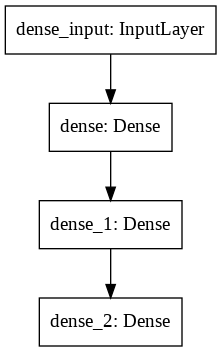

In [ ]:
plot_model(same_model)

In [ ]:
same_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               125568    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 142,209
Trainable params: 142,209
Non-trainable params: 0
_________________________________________________________________


**Точность модели**

In [ ]:
y_predicted = same_model.predict(x_test)
np.mean(np.squeeze(y_predicted > 0.5) == Y_test)

0.48536

In [ ]:
weights = model.get_weights()

In [ ]:
model.save_weights('custom_weights.h5', save_format='h5')

In [ ]:
!ls

custom_weights.h5  model.png	     saved_model
entire_model	   model_weights.h5  saved_model_20_units.h5
imdb_model	   my_model	     saved_model_named_layer
imdb_model_tf	   my_model_h5	     saved_model_named_layer.h5
logs		   sample_data


In [ ]:
same_model.load_weights('custom_weights.h5')

In [ ]:
y_predicted = same_model.predict(x_test)
np.mean(np.squeeze(y_predicted > 0.5) == Y_test)

0.85964

In [ ]:
import h5py

loaded_weights = h5py.File('custom_weights.h5','r')

In [ ]:
print({i: k for i, k in loaded_weights.items()})

{'dense': <HDF5 group "/dense" (1 members)>, 'dense_1': <HDF5 group "/dense_1" (1 members)>, 'dense_2': <HDF5 group "/dense_2" (1 members)>}


# Обучение модели

## Обучаем модель "из директории"





In [ ]:
!tree /root/.keras/ 

/root/.keras/
├── datasets
│   └── imdb.npz
└── keras.json

1 directory, 2 files


**Создаем ImageDataGenerator для "flow from directory"**

In [ ]:
tf.keras.preprocessing.image.ImageDataGenerator

In [ ]:
# thx https://gist.github.com/frogermcs/ed9fc359941efe54cc80d5b15f87bf77

data_root = tf.keras.utils.get_file(
  'flower_photos',
  'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
   untar=True)
   
 # Create data generator for training and validation
IMAGE_SHAPE = (224, 224)
TRAINING_DATA_DIR = str(data_root)

datagen_kwargs = dict(rescale=1./255, validation_split=.20)
datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
valid_generator = datagen.flow_from_directory(
    TRAINING_DATA_DIR, 
    subset="validation", 
    shuffle=True,
    target_size=IMAGE_SHAPE,
    class_mode='categorical'
)

# train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
train_generator = datagen.flow_from_directory(
    TRAINING_DATA_DIR, 
    subset="training", 
    shuffle=True,
    target_size=IMAGE_SHAPE,
    class_mode='categorical'

)

228818944/228813984 [==============================] - 2s 0us/step
Found 731 images belonging to 5 classes.
Found 2939 images belonging to 5 classes.


In [ ]:
!tree /root/.keras/datasets/flower_photos/ -L 1 -d

/root/.keras/datasets/flower_photos/
├── daisy
├── dandelion
├── roses
├── sunflowers
└── tulips

5 directories


Количество классов и сэмплов можно получить так:

In [ ]:
valid_generator.num_classes

5

In [ ]:
valid_generator.n

731

## Создание генератора данных с "авторской" логикой

In [ ]:
from tensorflow.keras.utils import Sequence

def open_file(filename):
  ...

class Mygenerator(Sequence):
  def __init__(self, x_set, y_set, batch_size):
    self.x, self.y = x_set, y_set
    self.batch_size = batch_size

  def __len__(self):
    # Определяет, через сколько батчей остановиться при итерировании.
    return len(self.x) - 1 // self.batch_size + 1

  def __getitem__(self, idx):
    # Этот метод будет вызываться на каждой итерации for,
    # и значение idx каждый раз будет увеличиваться.
    batch_x = self.x[idx * self.batch_size:(idx + 1) * self.batch_size]
    batch_y = self.y[idx * self.batch_size:(idx + 1) * self.batch_size]

    x = [open_file(filename) for filename in batch_x] 
    y = [open_file(filename) for filename in batch_y]
    return np.array(x), np.array(y)

In [ ]:
my_generator = Mygenerator([1,2,3,], [3,4,5], 2)

![Model definition: spectrum of workflows](https://keras-dev.s3.amazonaws.com/tutorials-img/model-building-spectrum.png)


## Простой пример Transfer Learning в функциональном API


In [ ]:
from tensorflow.keras import Model

In [ ]:
mob_net = keras.applications.mobilenet_v2.MobileNetV2(input_shape=None, 
                                                       alpha=1.0,
                                                       include_top=True,
                                                       weights='imagenet',
                                                       input_tensor=None,
                                                       pooling=None,
                                                       classes=1000)

14540800/14536120 [==============================] - 0s 0us/step


In [ ]:
target_layer_name = mob_net.layers[-2].name

In [ ]:
target_layer_name

'global_average_pooling2d'

In [ ]:
mob_net.get_layer(target_layer_name).output_shape

(None, 1280)

In [ ]:
mob_net.trainable = False
for layer in mob_net.layers:
    layer.trainable = False

In [ ]:
feature_extracotor_layer = mob_net.get_layer(target_layer_name)

In [ ]:
feature_extracotor_layer

In [ ]:
my_output_layer = Dense(valid_generator.num_classes, activation='softmax')
my_out = my_output_layer(feature_extracotor_layer.output)

In [ ]:
my_out

<tf.Tensor 'dense_4/Identity:0' shape=(None, 5) dtype=float32>

In [ ]:
flower_model = keras.Model(mob_net.inputs, my_out)

In [ ]:
flower_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
hist = flower_model.fit(train_generator,
                        validation_data=valid_generator,
                        epochs=1, 
                                  # callbacks=[...]
                                 )

92/92 [==============================] - 13s 137ms/step - loss: 0.1135 - accuracy: 0.9762 - val_loss: 0.3992 - val_accuracy: 0.8659


## Собственные метрики

In [ ]:
import tensorflow as tf

### Определение своих метрик

In [ ]:
class BinaryTruePositives(tf.keras.metrics.Metric):

    def __init__(self, name='binary_true_positives', **kwargs):
        super(BinaryTruePositives, self).__init__(name=name, **kwargs)
        self.true_positives = self.add_weight(name='tp', initializer='zeros')

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.cast(y_true, tf.bool)
        y_pred = tf.cast(y_pred > 0.5, tf.bool)

        values = tf.logical_and(tf.equal(y_true, True), tf.equal(y_pred, True))
        values = tf.cast(values, self.dtype)
 
        self.true_positives.assign_add(tf.reduce_sum(values))

    def result(self):
        return self.true_positives

    def reset_states(self):
        self.true_positives.assign(0)
        
        
class BinaryFalsePositives(tf.keras.metrics.Metric):

    def __init__(self, name='binary_false_positives', **kwargs):
        super(BinaryFalsePositives, self).__init__(name=name, **kwargs)
        self.false_positives = self.add_weight(name='tp', initializer='zeros')

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.cast(y_true, tf.bool)
        y_pred = tf.cast(y_pred > 0.5, tf.bool)

        values = tf.logical_and(tf.equal(y_true, False), tf.equal(y_pred, True))
        values = tf.cast(values, self.dtype)
        if sample_weight is not None:
            sample_weight = tf.cast(sample_weight, self.dtype)
            values = tf.multiply(values, sample_weight)
        self.false_positives.assign_add(tf.reduce_sum(values))

    def result(self):
        return self.false_positives

    def reset_states(self):
        self.false_positives.assign(0)

### Обновление метрик "вручную" 

> Может быть нужно, если вы создаете свой цикл обучения модели

In [ ]:
m = BinaryTruePositives()
m.update_state(np.array([0., 1, 1, 1]), np.array([0., 1, 0, 0]))
print('Intermediate result:', m.result().numpy())

m.update_state(np.array([1., 1, 1, 1]), np.array([0., 1, 1, 0]))
print('Final result:', m.result().numpy())

Intermediate result: 1.0
Final result: 3.0


### Применение метрик к модели

In [ ]:

model = Sequential([Dense(128, activation='relu'),
                    Dense(128, activation='relu'), 
                    Dense(1, activation='sigmoid')]
                  )

model.compile('sgd', loss='binary_crossentropy',
              metrics=[BinaryTruePositives(), BinaryFalsePositives()])
h = model.fit(x_train, Y_train,
              verbose=1,
              validation_data=(x_test, Y_test),
              batch_size=128,
              epochs=10,
              callbacks=[tensorboard]
             )

Epoch 1/10
196/196 [==============================] - 2s 10ms/step - loss: 0.6870 - binary_true_positives: 7708.0000 - binary_false_positives: 6478.0000 - val_loss: 0.6726 - val_binary_true_positives: 7132.0000 - val_binary_false_positives: 4592.0000
Epoch 2/10
196/196 [==============================] - 2s 8ms/step - loss: 0.6536 - binary_true_positives: 7824.0000 - binary_false_positives: 4020.0000 - val_loss: 0.6362 - val_binary_true_positives: 8807.0000 - val_binary_false_positives: 4175.0000
Epoch 3/10
196/196 [==============================] - 2s 8ms/step - loss: 0.6047 - binary_true_positives: 9171.0000 - binary_false_positives: 3629.0000 - val_loss: 0.5775 - val_binary_true_positives: 9180.0000 - val_binary_false_positives: 3199.0000
Epoch 4/10
196/196 [==============================] - 2s 8ms/step - loss: 0.5377 - binary_true_positives: 9755.0000 - binary_false_positives: 3102.0000 - val_loss: 0.5111 - val_binary_true_positives: 9526.0000 - val_binary_false_positives: 2707.0000

## Можно ли сделать метрики сериализуемыми (сохраняемыми)?

> Да! Для этого нужен `get_config`. Но проще всего наследовать от абстрактного класса метрики, например, [`MeanMetric`](https://github.com/tensorflow/tensorflow/blob/2b96f3662bd776e277f86997659e61046b56c315/tensorflow/python/keras/metrics.py#L607), и ваша метрика автоматически унаследует `get_config`. Главное, чтобы она соответствовала базовому классу _по сути_.

## Activity regularizers

> Как добавить $||w||_2^2$ к слою, чтобы он учитывался при обучении модели?

In [ ]:
dir(keras.regularizers)

['L1L2',
 'Regularizer',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'deserialize',
 'get',
 'l1',
 'l1_l2',
 'l2',
 'serialize']

In [ ]:
class Linear(keras.layers.Layer):
    """y = w.x + b"""

    def __init__(self, units=32):
        super(Linear, self).__init__()
        self.units = units

    def build(self, input_shape):
        self.w = self.add_weight(shape=(input_shape[-1], self.units),
                               initializer='random_normal',
                               trainable=True)
        self.b = self.add_weight(shape=(self.units,),
                               initializer='random_normal',
                               trainable=True)

    def call(self, inputs):
        self.add_loss(tf.reduce_sum(self.w ** 2) / 2, inputs=inputs)
        result = tf.matmul(inputs, self.w) + self.b
        self.add_loss(result, inputs=inputs)
        return result

In [ ]:
linear_layer = Linear(4)
y = linear_layer(tf.ones((2, 2)))
y

<tf.Tensor: shape=(2, 4), dtype=float32, numpy=
array([[-0.01637187,  0.05568011, -0.15307847, -0.01195802],
       [-0.01637187,  0.05568011, -0.15307847, -0.01195802]],
      dtype=float32)>

# Как определить свой Loss

* Чтобы определить свой лосс, лучше всего унаследоваться от класса `keras.losses.LossFunctionWrapper`. Это сделает ваш лосс сохраняемым и встроенным в экосистему `keras`.
* Можно поступить проще и определить функцию с сигнатурой `loss_fn(y_true, y_pred, sample_weights=None)` и передавать ее в метод `model.compile()`.

In [ ]:
class LossFunctionWrapper(Loss):
  """Wraps a loss function in the `Loss` class."""

  def __init__(self,
               fn,
               reduction=losses_utils.ReductionV2.AUTO,
               name=None,
               **kwargs):
    """Initializes `LossFunctionWrapper` class.
    Args:
      fn: The loss function to wrap, with signature `fn(y_true, y_pred,
        **kwargs)`.
      reduction: (Optional) Type of `tf.keras.losses.Reduction` to apply to
        loss. Default value is `AUTO`. `AUTO` indicates that the reduction
        option will be determined by the usage context. For almost all cases
        this defaults to `SUM_OVER_BATCH_SIZE`. When used with
        `tf.distribute.Strategy`, outside of built-in training loops such as
        `tf.keras` `compile` and `fit`, using `AUTO` or `SUM_OVER_BATCH_SIZE`
        will raise an error. Please see this custom training [tutorial]
        (https://www.tensorflow.org/tutorials/distribute/custom_training)
        for more details.
      name: (Optional) name for the loss.
      **kwargs: The keyword arguments that are passed on to `fn`.
    """
    super(LossFunctionWrapper, self).__init__(reduction=reduction, name=name)
    self.fn = fn
    self._fn_kwargs = kwargs

  def call(self, y_true, y_pred):
    """Invokes the `LossFunctionWrapper` instance.
    Args:
      y_true: Ground truth values.
      y_pred: The predicted values.
    Returns:
      Loss values per sample.
    """
    if tensor_util.is_tensor(y_pred) and tensor_util.is_tensor(y_true):
      y_pred, y_true = tf_losses_util.squeeze_or_expand_dimensions(
          y_pred, y_true)
    return self.fn(y_true, y_pred, **self._fn_kwargs)

  def get_config(self):
    config = {}
    for k, v in six.iteritems(self._fn_kwargs):
      config[k] = K.eval(v) if tf_utils.is_tensor_or_variable(v) else v
    base_config = super(LossFunctionWrapper, self).get_config()
    return dict(list(base_config.items()) + list(config.items()))
